In [1]:
# Defining all the imports

import torch
import torchvision
import time
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

In [2]:
## Defining the deep model

class DeepNet(nn.Module):
    def __init__(self):
        super(DeepNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 24, kernel_size = 11)
        self.conv2 = nn.Conv2d(24, 64, kernel_size = 5)
        self.deconv1 = nn.ConvTranspose2d(64, 24, kernel_size = 5)
        self.deconv2 = nn.ConvTranspose2d(24, 3, kernel_size = 11)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.deconv1(x))
        x = F.relu(self.deconv2(x))
        return x

## Defining the shallow model

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 24, kernel_size = 10)
        self.deconv2 = nn.ConvTranspose2d(24, 3, kernel_size = 10)
        
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.deconv2(x))
        return x
    

## Defining a function the normalized image pixel intensity between 0 and 1
    
def normalize(images):
    images = images.view(images.size(0), -1)
    images -= images.min(1, keepdim = True)[0]
    images /= images.max(1, keepdim = True)[0]
    images = images.view(3, 224, 224)
    return images

In [3]:
## Defining the optimization and the loss calculation method

net = Net()
deep = DeepNet()
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr = 0.01, momentum = 0.5)

In [4]:
## Preprocess the images into tensors and normali

preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

In [5]:
## Import test images for blurring

filename = "images/car.jpg"
im = Image.open(filename)
im_tensor = preprocess(im)
print(im_tensor.shape)

torch.Size([3, 224, 224])


In [6]:
### No longer in current use but might be useful later

## Testing the blurring on mnist images

# mnist_train = datasets.MNIST(root = './data', train = True,
#                                              download = True, 
#                                              transform = transform)
# trainloader = torch.utils.data.DataLoader(mnist_train, batch_size = 1, shuffle = True)

# dataiter = iter(trainloader)
# for i in range(10):
#     images, labels = dataiter.next()
#     if i == 1:


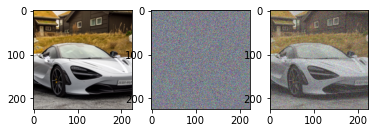

In [7]:
## Testing the addition of blurring to the images

# input without noise        
img = normalize(im_tensor)

# noise to be added to the input
noise = torch.normal(0, 25, size = (1, 3, 224, 224))
noise = normalize(noise[0])

# adding the noise to the image
imnoise = normalize(img + noise)

_, axs = plt.subplots(1, 3)
axs[0].imshow(img.permute(1, 2, 0), cmap = 'gray')
axs[1].imshow(noise.permute(1, 2, 0), cmap = 'gray')
axs[2].imshow(imnoise.permute(1, 2, 0), cmap = 'gray')

In [11]:
for layer in deep.children():
    if hasattr(layer, 'reset_parameters'):
        layer.reset_parameters()

0.2288035750389099
0.2288035750389099
0.2288035750389099
0.2288035750389099
0.2288035750389099
0.2288035750389099
0.2288035750389099
0.2288035750389099
0.2288035750389099
0.2288035750389099


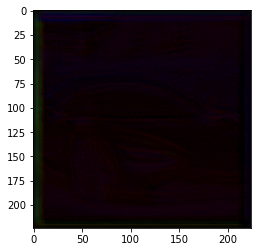

In [12]:
for i in range(1000):
    optimizer.zero_grad()
    out = deep(imnoise.reshape(1, 3, 224, 224))
    loss = criterion(out, img.reshape(1, 3, 224, -1))
    loss.backward()
    optimizer.step()
    
    if i % 100 == 99:
        print(loss.item())

out = out.detach().numpy()
out = out[0].transpose(1, 2, 0)
plt.imshow(out)

In [10]:

out = out.detach().numpy()
out = out[0].transpose(1, 2, 0)
plt.imshow(out)

AttributeError: 'numpy.ndarray' object has no attribute 'detach'

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

NameError: name 'trainloader' is not defined

In [ ]:
for epoch in range(3):
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data 
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, out_img)
        loss.backward()
        optimizer.step()
        
        if i % 100 == 0:
            print(f'{epoch+1}, {i + 1:5d}: loss: {loss.item()}')
            running_loss = 0.0
        
print('finished_training')

NameError: name 'trainloader' is not defined